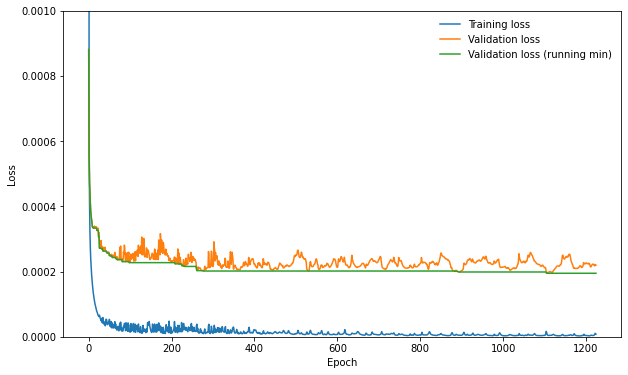

In [99]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import numpy as np

import matplotlib              as mpl
import matplotlib.pyplot       as plt
import matplotlib.colors       as mcolors
import matplotlib.patches      as mpatches
import matplotlib.transforms   as mtransforms
import matplotlib.font_manager as font_manager
%matplotlib inline

class LearnCurve:

    def __init__(self, loss_train, loss_validation, title, figsize, **kwargs):
        self.loss_train = loss_train
        self.loss_validation = loss_validation
        self.title   = title
        self.figsize = figsize
        for k, v in kwargs.items(): setattr(self, k, v)

        # self.config_fonts()

        return None


    def config_fonts(self):
        # Where to load external font...
        drc_py    = os.getcwd()
        drc_font  = os.path.join("fonts", "Helvetica")
        fl_ttf    = f"Helvetica.ttf"
        path_font = os.path.join(drc_py, drc_font, fl_ttf)
        prop_font = font_manager.FontProperties( fname = path_font )

        # Add Font and configure font properties
        font_manager.fontManager.addfont(path_font)
        prop_font = font_manager.FontProperties(fname = path_font)
        self.prop_font = prop_font

        # Specify fonts for pyplot...
        plt.rcParams['font.family'] = prop_font.get_name()
        plt.rcParams['font.size']   = 18

        return None


    def create_panels(self):
        nrows, ncols = 1, 1
        fig = plt.figure(figsize = self.figsize)

        gspec   = fig.add_gridspec(nrows, ncols)
        ax_img1 = fig.add_subplot(gspec[0,0])
        return fig, ax_img1


    def plot_img1(self):
        loss_train      = self.loss_train
        loss_validation = self.loss_validation

        x = [ loss[0] for loss in loss_train ]
        y = [ loss[1] for loss in loss_train ]
        self.ax_img1.plot(x, y, label = "Training loss")

        x = [ loss[0] for loss in loss_validation ]
        y = [ loss[1] for loss in loss_validation ]
        self.ax_img1.plot(x, y, label = "Validation loss")
        
        min_loss = float('inf')
        x = []
        y = []
        for i, loss in loss_validation:
            if loss < min_loss:
                min_loss = loss
            x.append(i)
            y.append(min_loss)
        self.ax_img1.plot(x, y, label = "Validation loss (running min)")
        
        self.ax_img1.set_ylim(bottom = 0.0)
        self.ax_img1.set_xlabel('Epoch')
        self.ax_img1.set_ylabel('Loss')
        self.ax_img1.legend(
            edgecolor = "none",
            ncol      = 1,
            loc       = "best",
        )
        
        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        # self.ax_img1.set_xlim([0, 180])
        self.ax_img1.set_ylim([0, 1e-3])
        self.ax_img1.axhline(y=1, color='r')
        # self.ax_img1.axvline(x=175, color='r')


    def show(self, filename = None): 
        self.fig, self.ax_img1 = self.create_panels()

        self.plot_img1()

        if not isinstance(filename, str): 
            plt.show()
        else:
            # Set up drc...
            DRCPDF         = "pdfs"
            drc_cwd        = os.getcwd()
            prefixpath_pdf = os.path.join(drc_cwd, DRCPDF)
            if not os.path.exists(prefixpath_pdf): os.makedirs(prefixpath_pdf)

            # Specify file...
            fl_pdf = f"{filename}.pdf"
            path_pdf = os.path.join(prefixpath_pdf, fl_pdf)

            # Export...
            plt.savefig(path_pdf, dpi = 100)




def get_loss(lines, istrain = True):
    mode = "trainer" if istrain else "validator"

    # Keep lines that have validation loss for each epoch...
    idx = {}
    losses = []
    for line in lines:
        line = line.strip()

        substrs_to_match = [ mode, "loss mean" ]

        if all( substr_to_match in line for substr_to_match in substrs_to_match ):
            # Backcompatible with old format...
            line = line.replace(":0", "")

            k1 = "epoch"
            idx[k1] = line.find(k1) + len(k1)

            k2 = ","
            idx[k2] = line.find(k2)

            # Obtain epoch...
            epoch = line[idx[k1] : idx[k2]]
            epoch = int(epoch)

            k3 = "loss mean"
            idx[k3] = line.find(k3) + len(k3)

            # Obtain loss...
            loss = line[idx[k3] : ]
            loss = float(loss)
            losses.append((epoch, loss))

    return losses




timestamp = "2023_0317_0930_32"
timestamp = "2023_0317_0931_07"
timestamp = "2023_0317_1153_21"
timestamp = "2023_0317_1157_27"
timestamp = "2023_0317_1547_40"
timestamp = "2023_0317_2047_44"


drc_log  = 'logs'
fl_log   = f"{timestamp}.train.log"
path_log = os.path.join(drc_log, fl_log)
with open(path_log,'r') as fh:
    lines = fh.readlines()

loss_train      = get_loss(lines, istrain = True)
loss_validation = get_loss(lines, istrain = False)

loss_train      = np.array( loss_train )
loss_validation = np.array( loss_validation )

winsize = 1
loss_train      = np.nanmean(loss_train.reshape(-1,winsize,2), axis = 1)
loss_validation = np.nanmean(loss_validation.reshape(-1,winsize,2), axis = 1)


fl_pdf = f"{timestamp}.learncurve"
learn_curve = LearnCurve(loss_train, loss_validation, title = "Learning Curve", figsize = (10,6))
learn_curve.show()
## learn_curve.show(filename = fl_pdf)

In [58]:
loss_train      = get_loss(lines, istrain = True)
loss_validation = get_loss(lines, istrain = False)

loss_train      = np.array( loss_train )
loss_validation = np.array( loss_validation )

In [59]:
loss_train, loss_validation

(array([[0.000000e+00, 2.076698e-02],
        [1.000000e+00, 2.489830e-03],
        [2.000000e+00, 1.239070e-03],
        [3.000000e+00, 8.519700e-04],
        [4.000000e+00, 6.657400e-04],
        [5.000000e+00, 5.557300e-04],
        [6.000000e+00, 4.854600e-04],
        [7.000000e+00, 4.369800e-04],
        [8.000000e+00, 4.009100e-04],
        [9.000000e+00, 3.726400e-04],
        [1.000000e+01, 3.495200e-04],
        [1.100000e+01, 3.302100e-04],
        [1.200000e+01, 3.135200e-04],
        [1.300000e+01, 2.990200e-04],
        [1.400000e+01, 2.861800e-04],
        [1.500000e+01, 2.746100e-04],
        [1.600000e+01, 2.640600e-04],
        [1.700000e+01, 2.543500e-04],
        [1.800000e+01, 2.454700e-04],
        [1.900000e+01, 2.372400e-04],
        [2.000000e+01, 2.296000e-04],
        [2.100000e+01, 2.224000e-04],
        [2.200000e+01, 2.156000e-04],
        [2.300000e+01, 2.092500e-04],
        [2.400000e+01, 2.031900e-04],
        [2.500000e+01, 1.974300e-04],
        [2.6

In [60]:
min(loss_train[:, 1]), min(loss_validation[:, 1])

(0.00010865, 0.00018458)